In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("mumbai.csv")

In [3]:
df.head()

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,22400000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",629.0,19.032800,72.896357,2.0,2.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Right fr...,35612.082671
1,35000000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",974.0,19.032800,72.896357,3.0,2.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Right fr...,35934.291581
2,31700000.0,"Ghatkopar East, Mumbai - Central Line, Maharas...",968.0,19.085600,72.909277,3.0,3.0,NaN,Under Construction,New Property,1.0,NaN,2.0,NaN,Flat,\n \n \n...,32747.933884
3,18700000.0,"Plot Number 283, Road Number 3, Jawahar Nagar,...",629.0,19.155756,72.846862,2.0,2.0,2.0,Ready to Move,New Property,1.0,NaN,3.0,Laxmi Callista,Flat,\n\n\n Welcome ...,29729.729730
4,13500000.0,"malad east, Malad East, Mumbai - North Mumbai,...",1090.0,19.177555,72.849887,2.0,2.0,NaN,NaN,New Property,1.0,Unfurnished,2.0,near uper govind nagar,Flat,\n \n \n...,12385.321101


In [6]:
df2 = df.drop(columns=["latitude","longitude","Balcony","Status","neworold","parking","Furnished_status","Lift","Landmarks","type_of_building","desc"],axis=1)

In [7]:
df2.head()

,price,Address,area,Bedrooms,Bathrooms,Price_sqft
0,22400000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",629.0,2.0,2.0,35612.082671
1,35000000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",974.0,3.0,2.0,35934.291581
2,31700000.0,"Ghatkopar East, Mumbai - Central Line, Maharas...",968.0,3.0,3.0,32747.933884
3,18700000.0,"Plot Number 283, Road Number 3, Jawahar Nagar,...",629.0,2.0,2.0,29729.729730
4,13500000.0,"malad east, Malad East, Mumbai - North Mumbai,...",1090.0,2.0,2.0,12385.321101


In [8]:
df2.isnull().sum()

price         0
Address       0
area          0
Bedrooms      0
Bathrooms     0
Price_sqft    0
dtype: int64

In [10]:
df2.shape

(6255, 6)

In [13]:
len(df2.Address.unique())

3632

In [15]:
Address_stats = df2.groupby("Address")['Address'].agg('count').sort_values(ascending=False)

In [16]:
Address_stats

Address
Mira Road, Mumbai - Mira Road and Beyond, Maharashtra                                                                                                                        154
Andheri West, Mumbai - Western Suburbs, Maharashtra                                                                                                                          129
Andheri East, Mumbai - Western Suburbs, Maharashtra                                                                                                                           81
Chembur, Mumbai - Harbour Line, Maharashtra                                                                                                                                   79
Mulund West, Mumbai - Central Line, Maharashtra                                                                                                                               78
                                                                                                           

In [17]:
len(Address_stats[Address_stats<=5])

3521

In [18]:
Address_less_than_five = Address_stats[Address_stats<=5]
Address_less_than_five

Address
Mira Road East, Mumbai, Maharashtra                                                                                                                                          5
Sindhi Society Chembur, Mumbai - Harbour Line, Maharashtra                                                                                                                   5
Wadala East, Mumbai - Harbour Line, Maharashtra                                                                                                                              5
Mulund, Mumbai - Central Line, Maharashtra                                                                                                                                   5
Borivali West, Mumbai, Borivali West, Mumbai - Western Suburbs, Maharashtra                                                                                                  5
                                                                                                                     

In [19]:
df2.Address = df2.Address.apply(lambda x : "others" if x in Address_less_than_five else x)

In [20]:
len(df2.Address.unique())

112

In [21]:
df2.head()

,price,Address,area,Bedrooms,Bathrooms,Price_sqft
0,22400000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",629.0,2.0,2.0,35612.082671
1,35000000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",974.0,3.0,2.0,35934.291581
2,31700000.0,"Ghatkopar East, Mumbai - Central Line, Maharas...",968.0,3.0,3.0,32747.933884
3,18700000.0,others,629.0,2.0,2.0,29729.729730
4,13500000.0,others,1090.0,2.0,2.0,12385.321101


In [22]:
dummies = pd.get_dummies(df2.Address)
dummies.head()

,"Agripada, Mumbai - South Mumbai, Maharashtra","Ambernath, Mumbai, Maharashtra","Andheri East, Mumbai - Western Suburbs, Maharashtra","Andheri East, Mumbai, Andheri East, Mumbai - Western Suburbs, Maharashtra","Andheri East, Mumbai, Marol, Mumbai - Western Suburbs, Maharashtra","Andheri West, Mumbai - Western Suburbs, Maharashtra","Andheri West, Mumbai, Andheri West, Mumbai - Western Suburbs, Maharashtra","Andheri West, Mumbai, Lokhandwala Complex, Mumbai - Western Suburbs, Maharashtra","Bandra East, Mumbai - Western Suburbs, Maharashtra","Bandra West, Mumbai - Western Suburbs, Maharashtra",...,"Vile Parle West, Mumbai - Western Suburbs, Maharashtra","Virar East, Mumbai - Mira Road and Beyond, Maharashtra","Virar West, Mumbai - Mira Road and Beyond, Maharashtra","Virar West, Mumbai., Virar West, Mumbai - Mira Road and Beyond, Maharashtra","Virar, Mumbai - Mira Road and Beyond, Maharashtra","Wadala, Mumbai - Harbour Line, Maharashtra","Walkeshwar, Mumbai - South Mumbai, Maharashtra","Worli, Mumbai - South Mumbai, Maharashtra","Worli, Mumbai, Worli, Mumbai - South Mumbai, Maharashtra",others
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
df3 = pd.concat([df2,dummies.drop('others',axis='columns')],axis='columns')
df3.head()

,price,Address,area,Bedrooms,Bathrooms,Price_sqft,"Agripada, Mumbai - South Mumbai, Maharashtra","Ambernath, Mumbai, Maharashtra","Andheri East, Mumbai - Western Suburbs, Maharashtra","Andheri East, Mumbai, Andheri East, Mumbai - Western Suburbs, Maharashtra",...,"Vile Parle East, Mumbai - Western Suburbs, Maharashtra","Vile Parle West, Mumbai - Western Suburbs, Maharashtra","Virar East, Mumbai - Mira Road and Beyond, Maharashtra","Virar West, Mumbai - Mira Road and Beyond, Maharashtra","Virar West, Mumbai., Virar West, Mumbai - Mira Road and Beyond, Maharashtra","Virar, Mumbai - Mira Road and Beyond, Maharashtra","Wadala, Mumbai - Harbour Line, Maharashtra","Walkeshwar, Mumbai - South Mumbai, Maharashtra","Worli, Mumbai - South Mumbai, Maharashtra","Worli, Mumbai, Worli, Mumbai - South Mumbai, Maharashtra"
0,22400000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",629.0,2.0,2.0,35612.082671,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,35000000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",974.0,3.0,2.0,35934.291581,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,31700000.0,"Ghatkopar East, Mumbai - Central Line, Maharas...",968.0,3.0,3.0,32747.933884,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18700000.0,others,629.0,2.0,2.0,29729.729730,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13500000.0,others,1090.0,2.0,2.0,12385.321101,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df4 = df3.drop("Address",axis=1)

In [25]:
df4.head()

,price,area,Bedrooms,Bathrooms,Price_sqft,"Agripada, Mumbai - South Mumbai, Maharashtra","Ambernath, Mumbai, Maharashtra","Andheri East, Mumbai - Western Suburbs, Maharashtra","Andheri East, Mumbai, Andheri East, Mumbai - Western Suburbs, Maharashtra","Andheri East, Mumbai, Marol, Mumbai - Western Suburbs, Maharashtra",...,"Vile Parle East, Mumbai - Western Suburbs, Maharashtra","Vile Parle West, Mumbai - Western Suburbs, Maharashtra","Virar East, Mumbai - Mira Road and Beyond, Maharashtra","Virar West, Mumbai - Mira Road and Beyond, Maharashtra","Virar West, Mumbai., Virar West, Mumbai - Mira Road and Beyond, Maharashtra","Virar, Mumbai - Mira Road and Beyond, Maharashtra","Wadala, Mumbai - Harbour Line, Maharashtra","Walkeshwar, Mumbai - South Mumbai, Maharashtra","Worli, Mumbai - South Mumbai, Maharashtra","Worli, Mumbai, Worli, Mumbai - South Mumbai, Maharashtra"
0,22400000.0,629.0,2.0,2.0,35612.082671,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,35000000.0,974.0,3.0,2.0,35934.291581,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,31700000.0,968.0,3.0,3.0,32747.933884,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18700000.0,629.0,2.0,2.0,29729.729730,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13500000.0,1090.0,2.0,2.0,12385.321101,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##  BUILDING THE MODEL

In [26]:
X = df4.drop("price",axis=1)
y =df4.price

In [29]:
print(y)

0       22400000.0
1       35000000.0
2       31700000.0
3       18700000.0
4       13500000.0
           ...    
6250    19500000.0
6251    22000000.0
6252    20000000.0
6253    11000000.0
6254    15000000.0
Name: price, Length: 6255, dtype: float64


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [33]:
model.score(X_test,y_test)

0.8703523989354037

In [35]:
from sklearn import metrics
train_data_pred = model.predict(X_train)

In [36]:
train_data_R_square_error = metrics.r2_score(y_train , train_data_pred)
train_data_R_square_error

0.886839934960785

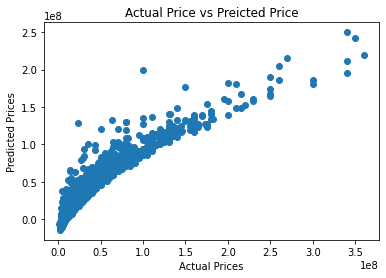

In [39]:
plt.scatter(y_train,train_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [40]:

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85713256, 0.89509046, 0.85739348, 0.86781421, 0.89347853])

In [41]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce t

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in ver

,model,best_score,best_params
0,linear_regression,0.874182,{'normalize': True}
1,lasso,0.874183,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.977426,"{'criterion': 'mse', 'splitter': 'best'}"


In [54]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [56]:
predict_price("Worli, Mumbai, Worli, Mumbai - South Mumbai, Maharashtra",3000,3,3)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


54561219.44094269

In [57]:
predict_price("Mira Road, Mumbai - Mira Road and Beyond, Maharashtra",955,2,2)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-6056570.049964618

In [58]:
predict_price("Andheri West, Mumbai - Western Suburbs, Maharashtra",3000,4,6)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


47788064.83063854

In [59]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

In [60]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))